<a href="https://colab.research.google.com/github/melinashk/ai-health-project/blob/main/Artificial_Intelligence_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [156]:
!pip install numpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [157]:
!pip install pandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [158]:
!pip install nlp

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [159]:
!pip install sklearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [160]:
!pip install seaborn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [161]:
!pip install matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [162]:
!pip install wordcloud

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [163]:
#importing different python libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

In [164]:
#stopwords identification
import nltk
nltk.download('stopwords')
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [165]:
#loading datasets
df = pd.read_csv('/Data without labels.csv')

In [166]:
df.head()

,Age,Sex,Description,Dental History,Medical History,Past Medication,Department
0,11,M,fall injury on table,none,none,zytee gel,Prosthodontics
1,21,M,pain left back region,none,none,none,OMR
2,26,M,deposits on teeth,none,none,none,OMR
3,10,M,partially erupted teeth present in upper region,none,none,none,POI
4,80,F,missing teeth in upper and lower region,complete denture since 5 months,cardiac disorder and hypertension,medication for hypertension and cardiac disorder,Prosthodontics


In [167]:
df.shape

(101, 7)

In [168]:
#counting number of missing values
df.isnull().sum()

Age                0
Sex                0
Description        0
Dental History     0
Medical History    0
Past Medication    0
Department         0
dtype: int64

In [169]:
df.describe()

,Age
count,101.000000
mean,32.326733
std,22.772839
min,4.000000
25%,11.000000
50%,26.000000
75%,51.000000
max,80.000000


In [170]:
df['Department'].value_counts()

OMR               32
Cons & Endo       26
POI               19
Prosthodontics    17
Orthodontics       7
Name: Department, dtype: int64

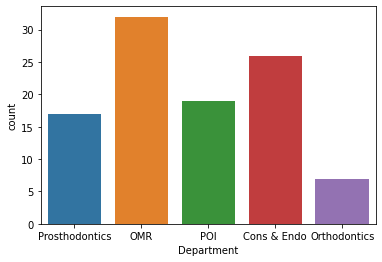

In [171]:
sns.countplot(x = 'Department', data = df)

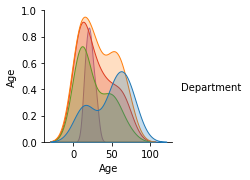

In [172]:
sns.pairplot(df,hue='Department')

In [173]:
X = df.drop(columns= ['Age','Sex', 'Dental History', 'Medical History', 'Past Medication', 'Department'],axis=1)
Y = df['Department']

In [174]:
print(X)


                                         Description
0                               fall injury on table
1                              pain left back region
2                                  deposits on teeth
3    partially erupted teeth present in upper region
4            missing teeth in upper and lower region
..                                               ...
96            decayed tooth in right back regionafo 
97                       upper and lower jaw paining
98      pain in lower right back region since 1 week
99            decayed lower left tooth since 2 years
100          swelling in the left upper front region

[101 rows x 1 columns]


In [175]:
print (Y)

0      Prosthodontics
1                 OMR
2                 OMR
3                 POI
4      Prosthodontics
            ...      
96        Cons & Endo
97                OMR
98                OMR
99        Cons & Endo
100               POI
Name: Department, Length: 101, dtype: object


In [176]:
 port_stem = PorterStemmer()

In [177]:
def stemming(Description):
    stemmed_Description = re.sub('[^a-zA-Z]',' ',Description)
    stemmed_Description = stemmed_Description.lower()
    stemmed_Description = stemmed_Description.split()
    stemmed_Description = [port_stem.stem(word) for word in stemmed_Description if not word in stopwords.words('english')]
    stemmed_Description = ' '.join(stemmed_Description)
    return stemmed_Description
     

In [178]:
df['Description'] = df['Description'].apply(stemming)

In [179]:
print (df['Description'])

0                              fall injuri tabl
1                         pain left back region
2                                 deposit teeth
3      partial erupt teeth present upper region
4                 miss teeth upper lower region
                         ...                   
96             decay tooth right back regionafo
97                         upper lower jaw pain
98       pain lower right back region sinc week
99             decay lower left tooth sinc year
100               swell left upper front region
Name: Description, Length: 101, dtype: object


In [180]:
#Seperating data and label
X = df['Description'].values
Y = df['Department'].values

In [181]:
print(X)


['fall injuri tabl' 'pain left back region' 'deposit teeth'
 'partial erupt teeth present upper region'
 'miss teeth upper lower region' 'decay teeth upper back region'
 'pain lower right back region jaw day'
 'multipl miss teeth upper lower region mouth'
 'decay tooth upper front region' 'decay teeth left back region lower jaw'
 'decay teeth' 'irregular arrang upper lower front teeth'
 'irregular arrang upper front teeth' 'pain gum sinc year'
 'decay tooth upper left region' 'placement artifici teeth'
 'irregular arrang upper lower front teeth' 'artifici teeth place'
 'decay teeth' 'wound corner right region'
 'pain lower left region mouth month' 'fall injuri' 'deposit teeth'
 'replac miss teeth' 'mobil tooth right front region lower jaw'
 'swell present lower surfac tongu day'
 'decay tooth left lower back region' 'bleed gum month'
 'fractur fragment lower left region' 'upper complet dentur fell'
 'teeth need scale' 'pain left back region lower jaw sinc day'
 'sensit teeth sinc year'

In [182]:
print(Y)

['Prosthodontics' 'OMR' 'OMR' 'POI' 'Prosthodontics' 'OMR' 'OMR'
 'Prosthodontics' 'Cons & Endo' 'Cons & Endo' 'Cons & Endo' 'Orthodontics'
 'Orthodontics' 'POI' 'Cons & Endo' 'Prosthodontics' 'Orthodontics'
 'Prosthodontics' 'Cons & Endo' 'OMR' 'OMR' 'Prosthodontics' 'OMR'
 'Prosthodontics' 'POI' 'POI' 'Cons & Endo' 'POI' 'Cons & Endo'
 'Prosthodontics' 'POI' 'OMR' 'POI' 'Prosthodontics' 'OMR' 'POI'
 'Orthodontics' 'Prosthodontics' 'Prosthodontics' 'Orthodontics'
 'Cons & Endo' 'Cons & Endo' 'Cons & Endo' 'POI' 'OMR' 'Cons & Endo'
 'Prosthodontics' 'OMR' 'POI' 'POI' 'Cons & Endo' 'Cons & Endo' 'OMR'
 'POI' 'OMR' 'Cons & Endo' 'Prosthodontics' 'OMR' 'OMR' 'Cons & Endo'
 'Cons & Endo' 'OMR' 'Cons & Endo' 'POI' 'OMR' 'OMR' 'OMR' 'Cons & Endo'
 'Cons & Endo' 'OMR' 'Orthodontics' 'POI' 'POI' 'Prosthodontics'
 'Cons & Endo' 'OMR' 'Prosthodontics' 'OMR' 'OMR' 'OMR' 'OMR'
 'Prosthodontics' 'POI' 'OMR' 'Cons & Endo' 'POI' 'Cons & Endo' 'POI'
 'Cons & Endo' 'OMR' 'Orthodontics' 'Prosthodontics'

In [183]:
# converting the textual data to numerical data
vectorizer = TfidfVectorizer()
vectorizer.fit(X)

X = vectorizer.transform(X)

In [184]:
print(X)

  (0, 53)	0.6103165810080543
  (0, 21)	0.5601400141690643
  (0, 14)	0.5601400141690643
  (1, 41)	0.37853217558060337
  (1, 34)	0.5437116170416159
  (1, 24)	0.5680583861221443
  (1, 3)	0.48826298190679107
  (2, 54)	0.4111335307374386
  (2, 11)	0.9115751312444672
  (3, 58)	0.21951705448302253
  (3, 54)	0.2464562487877183
  (3, 41)	0.17889615861984368
  (3, 39)	0.5117180476221626
  (3, 36)	0.5464487095754779
  (3, 13)	0.5464487095754779
  (4, 58)	0.3690922022895724
  (4, 54)	0.41438730055536965
  (4, 41)	0.3007929261881085
  (4, 28)	0.6743994051422116
  (4, 27)	0.3830968144562068
  (5, 58)	0.4179727027095934
  (5, 54)	0.46926642965427334
  (5, 41)	0.3406282536853336
  (5, 9)	0.5440708667588517
  (5, 3)	0.4393712809512254
  :	:
  (96, 42)	0.727263354887526
  (96, 9)	0.34902742082559046
  (96, 3)	0.2818614896415921
  (97, 58)	0.4278998634735608
  (97, 34)	0.500888093128655
  (97, 27)	0.4441358381078922
  (97, 23)	0.6072529804862616
  (98, 59)	0.5832588645674408
  (98, 50)	0.4340166218070126

In [185]:
#Splitting data into training data and testing data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 2)
print(X.shape, X_train.shape, X_test.shape)

(101, 62) (80, 62) (21, 62)


In [186]:
#training using logistic regression
LR_model = LogisticRegression()

In [187]:
LR_model.fit(X_train, Y_train)

LogisticRegression()

In [188]:
# accuracy on training data
X_train_prediction = LR_model.predict(X_train)
LR_training_data_accuracy = accuracy_score(Y_train, X_train_prediction)

In [189]:

print('Accuracy on training data = ', LR_training_data_accuracy)

Accuracy on training data =  0.9375


In [190]:
# accuracy on test data
X_test_prediction = LR_model.predict(X_test)
LR_test_data_accuracy = accuracy_score(Y_test, X_test_prediction)

In [191]:
print('Accuracy on test data = ', LR_test_data_accuracy)

Accuracy on test data =  0.7619047619047619


In [192]:
DT_model = DecisionTreeClassifier()
DT_model.fit(X_train, Y_train)

DecisionTreeClassifier()

In [193]:
# accuracy on training data
X_train_prediction = DT_model.predict(X_train)
DT_training_data_accuracy = accuracy_score(Y_train, X_train_prediction)

In [194]:
print('Accuracy on training data = ', DT_training_data_accuracy)

Accuracy on training data =  0.9875


In [195]:
# accuracy on test data
X_test_prediction = DT_model.predict(X_test)
DT_test_data_accuracy = accuracy_score(Y_test, X_test_prediction)

In [196]:
print('Accuracy on test data = ', DT_test_data_accuracy)

Accuracy on test data =  0.7142857142857143


In [197]:
KN_model = KNeighborsClassifier(n_neighbors = 4)
KN_model.fit(X_train, Y_train)

KNeighborsClassifier(n_neighbors=4)

In [198]:
# accuracy on training data
X_train_prediction = KN_model.predict(X_train)
KN_training_data_accuracy = accuracy_score(Y_train, X_train_prediction)

In [199]:
print('Accuracy on training data = ', KN_training_data_accuracy)

Accuracy on training data =  0.8375


In [200]:
# accuracy on test data
X_test_prediction = KN_model.predict(X_test)
KN_test_data_accuracy = accuracy_score(Y_test, X_test_prediction)

In [201]:
print('Accuracy on test data = ', KN_test_data_accuracy)

Accuracy on test data =  0.5238095238095238


In [202]:

clfs = {
    'KN': KN_model,  
    'DT': DT_model, 
    'LR': LR_model, 
}
train_accuracy = [KN_training_data_accuracy, DT_training_data_accuracy, LR_training_data_accuracy]
test_accuracy = [KN_test_data_accuracy, DT_test_data_accuracy, LR_test_data_accuracy]

In [203]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Training Data':train_accuracy,'Test Data':test_accuracy}).sort_values('Training Data',ascending=False)



In [207]:
performance_df

,Algorithm,Training Data,Test Data
1,DT,0.9875,0.714286
2,LR,0.9375,0.761905
0,KN,0.8375,0.523810


In [205]:

performance_df1 = pd.melt(performance_df, id_vars = "Algorithm")

performance_df1

,Algorithm,variable,value
0,DT,Training Data,0.987500
1,LR,Training Data,0.937500
2,KN,Training Data,0.837500
3,DT,Test Data,0.714286
4,LR,Test Data,0.761905
5,KN,Test Data,0.523810


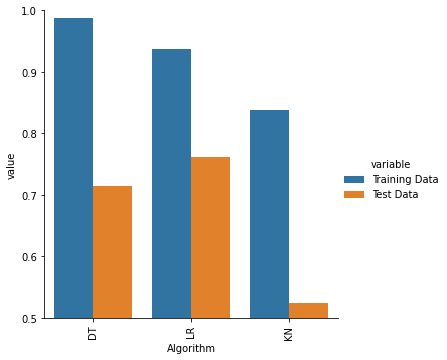

In [206]:
sns.catplot(x = 'Algorithm', y='value', 
               hue = 'variable',data=performance_df1, kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()